In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [51]:
def distance(X, x_test):
    return np.sqrt(np.sum((X - x_test) ** 2, axis=1))

In [52]:
def knn(X, y, x_test, k):
    nn = []
    dist = distance(X, x_test)
    tmp = max(dist)
    for i in range(k):
        idx = np.argmin(dist)
        nn.append([y[idx], dist[idx], *X[idx]])
        dist[idx] = tmp
    nn = np.array(nn)
    print("***NNNearest neighbors***: \n{}".format(nn))
    return nn

In [53]:
def kd_tree(X, y, depth, d, x_test, k):
    print("Current d: {}".format(d))
    if X.shape[0] == 0:
        print("Hmmmm")
        return None
    elif X.shape[0] <= k or d == depth:
        print("NICE")
        return knn(X, y, x_test, k)
    
    # column_max_variance = np.argmax(X.var(axis=0))
    column_max_variance = np.random.randint(0, 2)
    above_column_median = np.median(X[:, column_max_variance])

    if x_test[column_max_variance] >= above_column_median:
        print("R SIDE")
        flag = 'R'
        r_indices = X[:, column_max_variance] >= above_column_median
        nn = kd_tree(X[r_indices], y[r_indices], depth, d + 1, x_test, k)
    else:
        print("L SIDE")
        flag = 'L'
        l_indices = X[:, column_max_variance] < above_column_median
        nn = kd_tree(X[l_indices], y[l_indices], depth, d + 1, x_test, k)
    dist_to_sep_line = np.abs(x_test[column_max_variance] - above_column_median)
    if nn is None:
        print("nn is NONE")
        return knn(X, y, x_test, k)
    if flag == 'R':
        if dist_to_sep_line < nn[-1, 1]:
            print("R, {}".format(dist_to_sep_line))
            nn_2 = kd_tree(X[~r_indices], y[~r_indices], depth, d + 1, x_test, k)
            if nn_2 is None:
                print("nn_2 is NONE")
                return nn
        else:
            return nn
    else:
        if dist_to_sep_line < nn[-1, 1]:
            print("L, {}".format(dist_to_sep_line))
            nn_2 = kd_tree(X[~l_indices], y[~l_indices], depth, d + 1, x_test, k)
            if nn_2 is None:
                print("nn_2 is NONE")
                return nn
        else:
            return nn
    print("NN")
    print(nn)
    print()
    print("NN_2")
    print(nn_2)
    for i in range(nn.shape[0]):
        for j in range(nn_2.shape[0]):
            if nn_2[j, 1] < nn[i, 1]:
                nn_2[[j]], nn[[i]] = nn[[i]], nn_2[[j]]
    return nn

Current d: 1
L SIDE
Current d: 2
L SIDE
Current d: 3
R SIDE
Current d: 4
R SIDE
Current d: 5
R SIDE
Current d: 6
L SIDE
Current d: 7
R SIDE
Current d: 8
R SIDE
Current d: 9
NICE
***NNNearest neighbors***: 
[[0.         0.30756384 1.43220976 0.2       ]
 [0.         0.30867495 1.42733485 0.2       ]
 [0.         0.30867495 1.42733485 0.2       ]]
R, 0.09066807368984509
Current d: 9
NICE
***NNNearest neighbors***: 
[[0.         0.28522419 1.23288047 0.4       ]
 [0.         0.31907583 1.23288047 0.4       ]
 [0.         0.31907583 1.23288047 0.4       ]]
NN
[[0.         0.30756384 1.43220976 0.2       ]
 [0.         0.30867495 1.42733485 0.2       ]
 [0.         0.30867495 1.42733485 0.2       ]]

NN_2
[[0.         0.28522419 1.23288047 0.4       ]
 [0.         0.31907583 1.23288047 0.4       ]
 [0.         0.31907583 1.23288047 0.4       ]]
R, 0.3
Current d: 8
Hmmmm
nn_2 is NONE
L, 0.046391901636654964
Current d: 7
L SIDE
Current d: 8
NICE
***NNNearest neighbors***: 
[[0.         0.4384

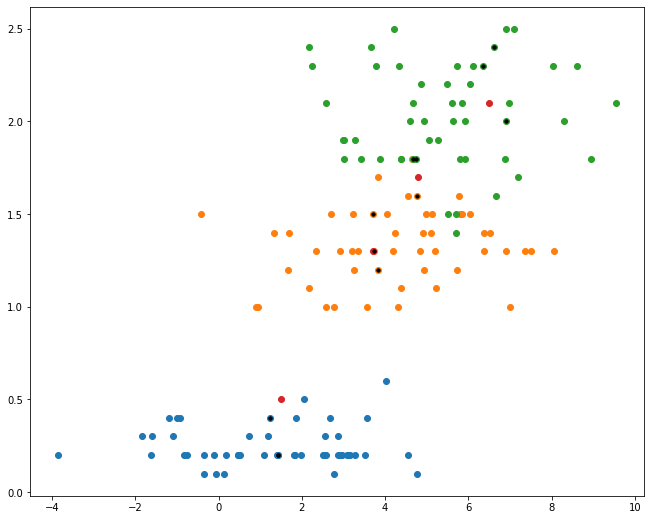

In [54]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
X[:, 0] += 1.25 * np.random.randn(150)
X[:, 0] += 1.25 * np.random.randn(150)

y = iris.target
x_test = np.array([[1.5, 0.5], [3.7, 1.3], [6.5, 2.1], [4.8, 1.7]])
plt.figure(figsize=(11, 9))
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(x_test[:, 0], x_test[:, 1])
for point in x_test:
    ans = kd_tree(X, y, 10, 1, point, 3)
    
    # print(point)
    # print(ans, end='\n\n')
    plt.scatter(ans[:, 2], ans[:, 3], color='black', s=11)
plt.show()